In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import csv
import json
import seaborn as sns

#importing libraries


In [113]:
df = pd.read_csv(r'2020-07-west-midlands-street.csv', index_col=False, dtype='unicode')

In [114]:
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,a6a1adc1d890114c30dac76d36d5f51c045bbb0f7bce28...,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,On or near Dollis Road,E01000257,Barnet 017B,Violence and sexual offences,Unable to prosecute suspect,NaN
1,e2af60423c5323fe46d00b434f21f8a3ebe6a5f1fd4d61...,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,On or near Dollis Road,E01000257,Barnet 017B,Violence and sexual offences,Unable to prosecute suspect,NaN
2,6eb13502ea880275aee6abdb1f5273ba758814bc973daf...,2020-07,West Midlands Police,West Midlands Police,-0.200779,51.580633,On or near Temple Gardens,E01000216,Barnet 035E,Public order,Investigation complete; no suspect identified,NaN
3,95c0f9892d3f74f8c263e92b043ad23b3eab9adbccc664...,2020-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Other theft,Investigation complete; no suspect identified,NaN
4,NaN,2020-07,West Midlands Police,West Midlands Police,-1.843740,52.594588,On or near Clarence Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
27745,886adb9687f166cfc9823477f9cebcc72e916ae94ecd1e...,2020-07,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
27746,87f7ce99cf714ae17c61872cd989bd4935f9c14b532d36...,2020-07,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
27747,ea5b0c27329f67ec0f4ab17c510189199bc60e049b93cd...,2020-07,West Midlands Police,West Midlands Police,-2.122842,52.579506,On or near Raby Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Court result unavailable,NaN
27748,0a28cd591a010c32e8e9ea58d2ff81d02bb949a26576ed...,2020-07,West Midlands Police,West Midlands Police,-2.118690,52.582971,On or near Warwick Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN


In [115]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,a6a1adc1d890114c30dac76d36d5f51c045bbb0f7bce28...,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,On or near Dollis Road,E01000257,Barnet 017B,Violence and sexual offences,Unable to prosecute suspect,NaN
1,e2af60423c5323fe46d00b434f21f8a3ebe6a5f1fd4d61...,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,On or near Dollis Road,E01000257,Barnet 017B,Violence and sexual offences,Unable to prosecute suspect,NaN
2,6eb13502ea880275aee6abdb1f5273ba758814bc973daf...,2020-07,West Midlands Police,West Midlands Police,-0.200779,51.580633,On or near Temple Gardens,E01000216,Barnet 035E,Public order,Investigation complete; no suspect identified,NaN
3,95c0f9892d3f74f8c263e92b043ad23b3eab9adbccc664...,2020-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Other theft,Investigation complete; no suspect identified,NaN
4,NaN,2020-07,West Midlands Police,West Midlands Police,-1.843740,52.594588,On or near Clarence Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN


In [116]:
df.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
27745,886adb9687f166cfc9823477f9cebcc72e916ae94ecd1e...,2020-07,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
27746,87f7ce99cf714ae17c61872cd989bd4935f9c14b532d36...,2020-07,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
27747,ea5b0c27329f67ec0f4ab17c510189199bc60e049b93cd...,2020-07,West Midlands Police,West Midlands Police,-2.122842,52.579506,On or near Raby Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Court result unavailable,NaN
27748,0a28cd591a010c32e8e9ea58d2ff81d02bb949a26576ed...,2020-07,West Midlands Police,West Midlands Police,-2.118690,52.582971,On or near Warwick Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
27749,f78db9e083ed4929a255d4f5987a3f7758531113f49ee1...,2020-07,West Midlands Police,West Midlands Police,-6.076806,54.031346,On or near,NaN,NaN,Violence and sexual offences,Unable to prosecute suspect,NaN


In [117]:
df.isnull()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
27745,False,False,False,False,False,False,False,False,False,False,False,True
27746,False,False,False,False,False,False,False,False,False,False,False,True
27747,False,False,False,False,False,False,False,False,False,False,False,True
27748,False,False,False,False,False,False,False,False,False,False,False,True


In [118]:
df.drop_duplicates()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,a6a1adc1d890114c30dac76d36d5f51c045bbb0f7bce28...,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,On or near Dollis Road,E01000257,Barnet 017B,Violence and sexual offences,Unable to prosecute suspect,NaN
1,e2af60423c5323fe46d00b434f21f8a3ebe6a5f1fd4d61...,2020-07,West Midlands Police,West Midlands Police,-0.203289,51.604106,On or near Dollis Road,E01000257,Barnet 017B,Violence and sexual offences,Unable to prosecute suspect,NaN
2,6eb13502ea880275aee6abdb1f5273ba758814bc973daf...,2020-07,West Midlands Police,West Midlands Police,-0.200779,51.580633,On or near Temple Gardens,E01000216,Barnet 035E,Public order,Investigation complete; no suspect identified,NaN
3,95c0f9892d3f74f8c263e92b043ad23b3eab9adbccc664...,2020-07,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Other theft,Investigation complete; no suspect identified,NaN
4,NaN,2020-07,West Midlands Police,West Midlands Police,-1.843740,52.594588,On or near Clarence Road,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
27745,886adb9687f166cfc9823477f9cebcc72e916ae94ecd1e...,2020-07,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
27746,87f7ce99cf714ae17c61872cd989bd4935f9c14b532d36...,2020-07,West Midlands Police,West Midlands Police,-2.119653,52.578988,On or near Granville Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN
27747,ea5b0c27329f67ec0f4ab17c510189199bc60e049b93cd...,2020-07,West Midlands Police,West Midlands Police,-2.122842,52.579506,On or near Raby Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Court result unavailable,NaN
27748,0a28cd591a010c32e8e9ea58d2ff81d02bb949a26576ed...,2020-07,West Midlands Police,West Midlands Police,-2.118690,52.582971,On or near Warwick Street,E01010530,Wolverhampton 035H,Violence and sexual offences,Unable to prosecute suspect,NaN


In [119]:
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [120]:
df_subset = df[['Month','Location','Crime type']]
print(df_subset)

         Month                     Location                    Crime type
0      2020-07       On or near Dollis Road  Violence and sexual offences
1      2020-07       On or near Dollis Road  Violence and sexual offences
2      2020-07    On or near Temple Gardens                  Public order
3      2020-07      On or near Walsall Road                   Other theft
4      2020-07     On or near Clarence Road         Anti-social behaviour
...        ...                          ...                           ...
27745  2020-07  On or near Granville Street  Violence and sexual offences
27746  2020-07  On or near Granville Street  Violence and sexual offences
27747  2020-07       On or near Raby Street  Violence and sexual offences
27748  2020-07    On or near Warwick Street  Violence and sexual offences
27749  2020-07                  On or near   Violence and sexual offences

[27750 rows x 3 columns]


In [121]:
df.drop_duplicates
df.isnull()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
27745,False,False,False,False,False,False,False,False,False,False,False,True
27746,False,False,False,False,False,False,False,False,False,False,False,True
27747,False,False,False,False,False,False,False,False,False,False,False,True
27748,False,False,False,False,False,False,False,False,False,False,False,True


In [122]:
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [144]:

dd = df.loc[df['Crime type'] != 0]

tot_delayed_f = len(dd)

months = dd.groupby('Month')

month = months['Crime ID'].count()

average = monthly_delays/tot_delayed_f

monthly_dd = pd.DataFrame({'Total Crime type':monthly_delays, '% Crime type': average})
monthly_dd

,Total Crime type,% Crime type
Month,,
2019-07,22600,0.851705


In [124]:
search  = df["Crime type"].value_counts()
search

Violence and sexual offences    10849
Anti-social behaviour            4384
Public order                     2341
Criminal damage and arson        2179
Vehicle crime                    1983
Other theft                      1494
Burglary                         1418
Shoplifting                       927
Robbery                           592
Other crime                       489
Drugs                             464
Possession of weapons             290
Bicycle theft                     176
Theft from the person             164
Name: Crime type, dtype: int64

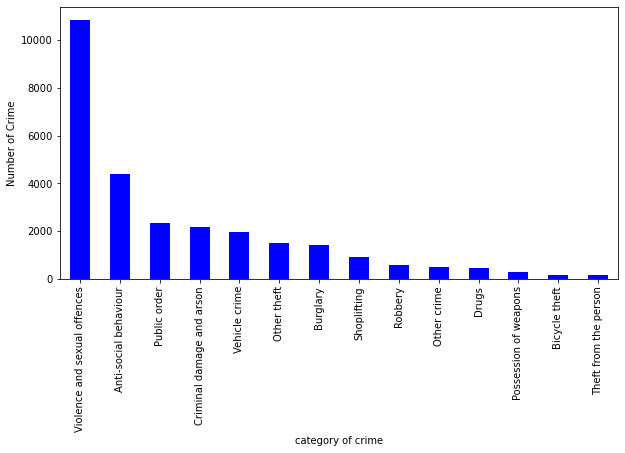

In [127]:
plot_outcome = search.plot.bar(figsize=(10,5) , color = 'blue')
plt.xlabel("category of crime")
plt.ylabel("Number of Crime")
plt.title("")
plt.show()